In [19]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
data = pd.read_excel("iris.xls")


In [2]:
km =KMeans(n_clusters=3,max_iter=200)
km.fit(data.iloc[:,0:3])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

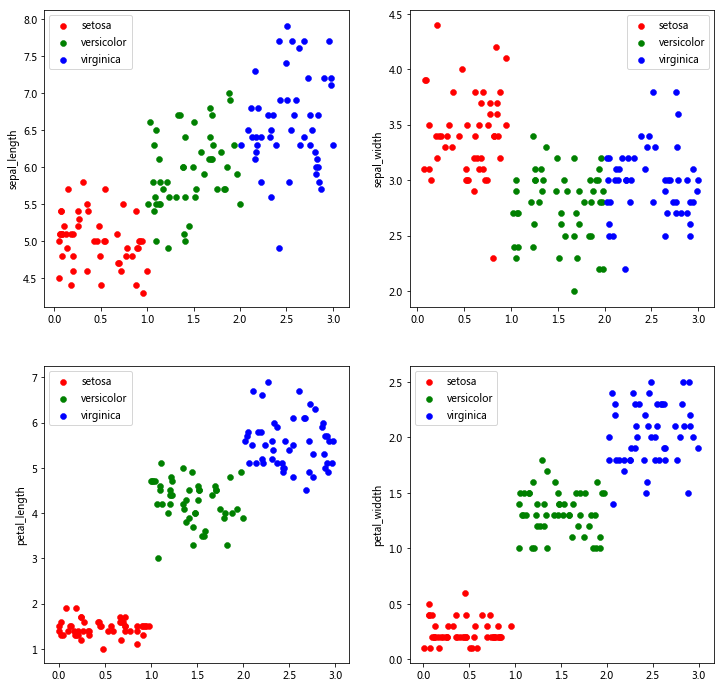

In [24]:
#画图
%matplotlib inline
fig,((ax0,ax1),(ax2,ax3))= plt.subplots(2,2,figsize=(12,12))
for i in range(4):
    #+pd.Series(np.random.random_sample(150))是防止数据显示在一条直线上
    globals()['ax{}'.format(i)].scatter((data[data['target']==0]).iloc[:,-1]+pd.Series(np.random.random_sample(150)),data.iloc[:,i],color='r',linewidth=0.5)
    globals()['ax{}'.format(i)].scatter((data[data['target']==1]).iloc[:,-1]+pd.Series(np.random.random_sample(150)),data.iloc[:,i],color='g',linewidth=0.5)
    globals()['ax{}'.format(i)].scatter((data[data['target']==2]).iloc[:,-1]+pd.Series(np.random.random_sample(150)),data.iloc[:,i],color='b',linewidth=0.5)
    globals()['ax{}'.format(i)].set_ylabel(data.columns[i])
    globals()['ax{}'.format(i)].legend(['setosa','versicolor','virginica'])


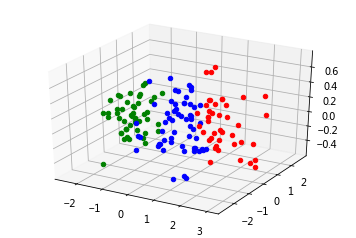

In [56]:
#聚类可视化
dataz = 1*(data-data.mean())/data.std()
pca = PCA(n_components=3)
new_data=pca.fit_transform(dataz.iloc[:,0:3])
newD = pd.DataFrame(new_data)
newD['c']=km.labels_
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
for i in range(150):
    if newD.iloc[i,-1]==0:
        ax.scatter(newD.iloc[i,0],newD.iloc[i,1],newD.iloc[i,2],color='b')
    if newD.iloc[i,-1]==1:
        ax.scatter(newD.iloc[i,0],newD.iloc[i,1],newD.iloc[i,2],color='g')
    if newD.iloc[i,-1]==2:
        ax.scatter(newD.iloc[i,0],newD.iloc[i,1],newD.iloc[i,2],color='r')
plt.show()